Class distribution in the dataset:
 Status
0    2630
1    1039
Name: count, dtype: int64
Class distribution in the training set:
 Status
0    2100
1     835
Name: count, dtype: int64
Class distribution in the test set:
 Status
0    530
1    204
Name: count, dtype: int64
Accuracy: 0.8692098092643051
Confusion Matrix:
 [[456  74]
 [ 22 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       530
           1       0.71      0.89      0.79       204

    accuracy                           0.87       734
   macro avg       0.83      0.88      0.85       734
weighted avg       0.89      0.87      0.87       734



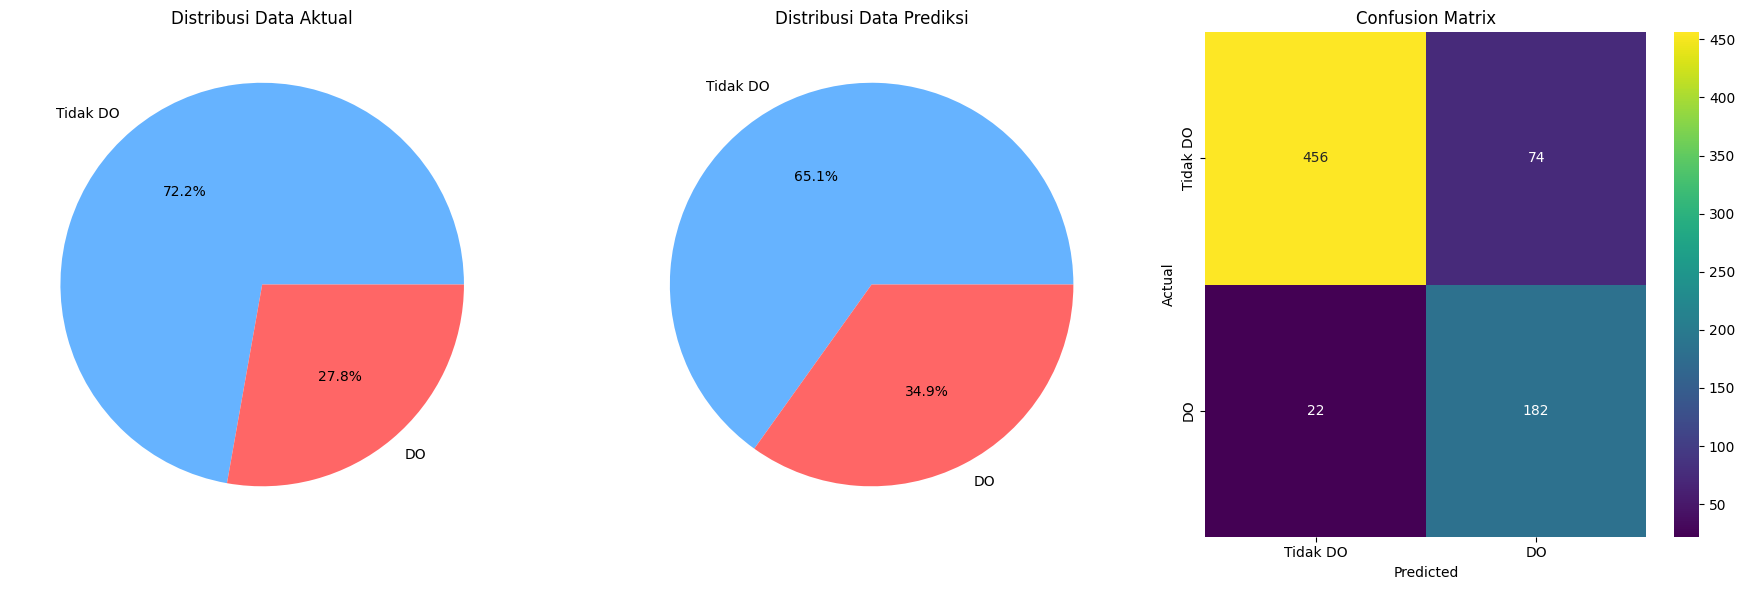

In [4]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.pipeline import Pipeline
    import joblib
    
    # Load the dataset
    pd.set_option('future.no_silent_downcasting', True)
    data = pd.read_csv('updated_data_train.csv', sep=";")
    
    # Replace categorical status with numerical values
    data['Status'] = data['Status'].replace({'DO': 1, 'Tidak DO': 0})
    
    # Replace commas with dots in numeric columns and convert them to float
    for column in ['IP', 'IPK', 'Jumlah Cuti', 'Jumlah Kehadiran']:
        data[column] = data[column].astype(str).str.replace(',', '.').astype(float)
    
    # Define features and target
    X = data[['IP', 'IPK', 'Jumlah Cuti', 'Jumlah Kehadiran']]
    y = data['Status']
    
    # Ensure target is binary and discrete
    if not pd.api.types.is_integer_dtype(y):
        y = y.astype(int)
    
    # Check class distribution
    print("Class distribution in the dataset:\n", y.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution in training and test sets
print("Class distribution in the training set:\n", y_train.value_counts())
print("Class distribution in the test set:\n", y_test.value_counts())

# Create a pipeline for SVM with standardization and class weight adjustment
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, 'svm_model.pkl')

# Predict on the test data
y_pred = pipeline.predict(X_test)
 
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Create pie chart for actual data
actual_counts = y_test.value_counts()
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.pie(actual_counts, labels=['Tidak DO', 'DO'], autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'])
plt.title('Distribusi Data Aktual')

# Create pie chart for predicted data
pred_counts = pd.Series(y_pred).value_counts()
plt.subplot(1, 3, 2)
plt.pie(pred_counts, labels=['Tidak DO', 'DO'], autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'])
plt.title('Distribusi Data Prediksi')

# Create confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=['Tidak DO', 'DO'], yticklabels=['Tidak DO', 'DO'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
import joblib
import pandas as pd

# Load the trained model
pipeline = joblib.load('svm_model.pkl')

# Function to get user input and make a prediction
def get_user_input():
    nama = input("Nama: ")
    prodi = input("Prodi: ")
    nim = input("NIM: ")
    jenjang = input("Jenjang: ")
    ip = float(input("IP: ").replace(',', '.'))
    ipk = float(input("IPK: ").replace(',', '.'))
    jumlah_cuti = int(input("Jumlah Cuti: "))
    jumlah_semester = int(input("Jumlah Semester: "))
    jumlah_kehadiran = int(input("Jumlah Kehadiran: "))

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'IP': [ip],
        'IPK': [ipk],
        'Jumlah Cuti': [jumlah_cuti],
        'Jumlah Kehadiran': [jumlah_kehadiran]
    })

    # Make a prediction
    prediction = pipeline.predict(input_data)[0]

    # Map prediction to status
    status = 'DO' if prediction == 1 else 'Tidak DO'

    # Print the result
    print("\nHasil Prediksi:")
    print(f"Nama: {nama}")
    print(f"Prodi: {prodi}")
    print(f"NIM: {nim}")
    print(f"Jenjang: {jenjang}")
    print(f"IP: {ip}")
    print(f"IPK: {ipk}")
    print(f"Jumlah Cuti: {jumlah_cuti}")
    print(f"Jumlah Semester: {jumlah_semester}")
    print(f"Jumlah Kehadiran: {jumlah_kehadiran}")
    print(f"Status: {status}")

# Run the function
get_user_input()
